**KUIS 2.1 Pembelajaran Mesin**

Tentang dataset:
Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatan tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label #N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.

Ketentuan:
1. Pengerjaan secara individu alias setiap mahasiswa!
2. Terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.
3. Tidak boleh ada duplikasi pekerjaan antar mahasiswa (evaluasi pemahaman pengerjaan kuis 2 dilaksanakan pada Minggu ke-14)


Soal:
1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)
3. Tentukan data validasi! (5 poin)
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)
7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (20 poin)
8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)


Pengumpulan:
1. Cantumkan link Repo atau Google Collab (jangan lupa set Public)
2. Tidak perlu ada video presentasi



Referensi:

https://medium.com/@assitahasna/visualization-project-pacmann-album-data-analysis-b5d49e89b19a

https://medium.com/data-science-indo/pandemi-covid-19-dan-wisatawan-manca-negara-berkunjung-ke-indonesia-dalam-data-7521a5c3e01

https://medium.com/@pojokstats/proyek-visualisasi-data-shot-map-di-sepak-bola-dengan-python-9dcd49e7f9b4

https://medium.com/@alvin.noza/visualisasi-titik-api-di-indonesia-yang-terobservasi-oleh-viirs-f16f541fc2e5

https://medium.com/@dewiastutisuhendro/analisa-penjualan-produk-elektronik-lazada-tahun-2016-2018-19c08d19fc5e

https://medium.com/@kristalinaks/pertumbuhan-kc-dpk-kredit-umkm-bank-di-pulau-jawa-periode-juni-2021-s-d-mei-2022-ce614546c1cd

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

#Load data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset_quiz.csv')

pd.set_option('display.max_columns', None)
df.head()

Mounted at /content/drive


,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [3]:
#Pengecekan nilai #N/A
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_ketua            82 non-null     float64
 1   id_anggota1         80 non-null     float64
 2   id_anggota2         81 non-null     float64
 3   id_anggota3         82 non-null     float64
 4   id_anggota4         72 non-null     float64
 5   id_anggota5         1 non-null      float64
 6   keterlibatan_vltr   85 non-null     object 
 7   jml_vltr_terlibat   85 non-null     int64  
 8   tahun               85 non-null     int64  
 9   skema               85 non-null     object 
 10  luaran_hki          85 non-null     object 
 11  jenis_luaran_hki    85 non-null     object 
 12  potensi_hki         85 non-null     object 
 13  luaran_lain         85 non-null     object 
 14  jenis_luaran_lain   85 non-null     object 
 15  status_luaran_lain  85 non-null     object 
dtypes: float64

In [4]:
#Mengatasi data dengan missing values

#Membuang kolom id_anggota5 dikarenakan hanya ada 1 data yang non-null
del df['id_anggota5']

#Replace nilai missing values.
#Dikarenakan id tidak bisa menghasilkan nilai mean maka dari itu akan digantikan dengan nilai modus

#Kolom id_ketua
mode= df[df["id_ketua"]!="NaN"]["id_ketua"].mode()[0]
df['id_ketua'] = df['id_ketua'].replace("NaN", mode)

#Kolom id_anggota1
mode= df[df["id_anggota1"]!="NaN"]["id_anggota1"].mode()[0]
df['id_anggota1'] = df['id_anggota1'].replace("NaN", mode)

#Kolom id_anggota2
mode= df[df["id_anggota2"]!="NaN"]["id_anggota2"].mode()[0]
df['id_anggota2'] = df['id_anggota2'].replace("NaN", mode)

#Kolom id_anggota3
mode= df[df["id_anggota3"]!="NaN"]["id_anggota3"].mode()[0]
df['id_anggota3'] = df['id_anggota3'].replace("NaN", mode)

#Kolom id_anggota4
mode= df[df["id_anggota4"]!="NaN"]["id_anggota4"].mode()[0]
df['id_anggota4'] = df['id_anggota4'].replace("NaN", mode)


df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


**5 Jenis Visualisasi**

Text(0.5, 0, '\nTahun')

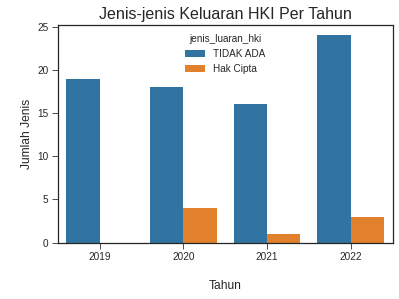

In [5]:
#Visualisasi 1
plt.style.use('seaborn-ticks')

sns.countplot(x="tahun", hue="jenis_luaran_hki", data=df)
plt.title('Jenis-jenis Keluaran HKI Per Tahun', size=16)
plt.ylabel('\nJumlah Jenis', size=12)
plt.xlabel('\nTahun', size=12)

Text(0.5, 0, '\nTahun')

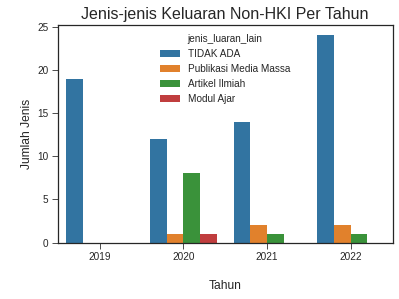

In [6]:
#Visualisasi 2
plt.style.use('seaborn-ticks')

sns.countplot(x="tahun", hue="jenis_luaran_lain", data=df)
plt.title('Jenis-jenis Keluaran Non-HKI Per Tahun', size=16)
plt.ylabel('\nJumlah Jenis', size=12)
plt.xlabel('\nTahun', size=12)


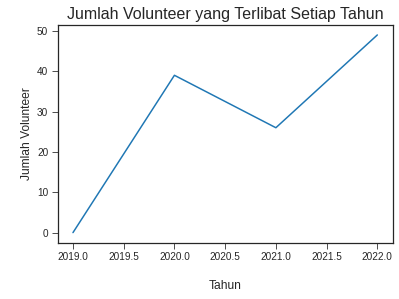

In [7]:
#Visualisasi 3
plt.style.use('seaborn-ticks')

x = df['tahun'].unique()
y = df.groupby('tahun')['jml_vltr_terlibat'].sum()
plt.title('Jumlah Volunteer yang Terlibat Setiap Tahun', size=16)
plt.ylabel('\nJumlah Volunteer', size=12)
plt.xlabel('\nTahun', size=12)
plt.plot(x, y)
plt.show()

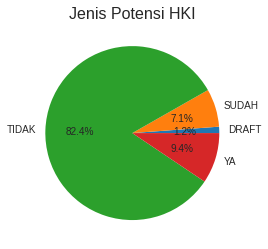

In [8]:
#Visualisasi 4
plt.style.use('seaborn-ticks')

data = df.groupby(['potensi_hki'])['potensi_hki'].count()
labels = df['potensi_hki'].unique()
labels.sort()
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Jenis Potensi HKI', size=16)
plt.show()

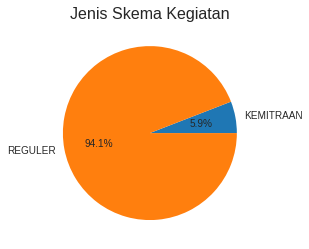

In [9]:
#Visualisasi 5
plt.style.use('seaborn-ticks')

data = df.groupby(['skema'])['skema'].count()
labels = df['skema'].unique()
labels.sort()
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Jenis Skema Kegiatan', size=16)
plt.show()

Encode label

In [10]:
#Encode label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
  df[column]=le.fit_transform(df[column])

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,4,6,3,18,4,0,0,0,1,1,1,2,0,3,1
1,5,4,14,8,31,0,0,0,1,1,1,2,0,3,1
2,1,15,18,37,25,0,0,0,1,1,1,2,0,3,1
3,20,10,16,30,20,0,0,0,1,1,1,2,0,3,1
4,17,17,2,1,13,0,0,0,1,1,1,2,0,3,1


**Seleksi Fitur**

In [11]:
#Slice Dataframe
x = df.drop('keterlibatan_vltr', axis='columns')
y = df['keterlibatan_vltr']

#Cek jumlah fitur dan instance
x.shape

(85, 14)

**Pemilahan data training, testing dan validasi**

In [12]:
#Splitting Data
from sklearn.model_selection import train_test_split

#Data main akan dipisahkan menjadi data train dan data validation 
x_main,x_test,y_main,y_test=train_test_split(x,y,test_size=0.1,stratify=y)

x_train,x_val,y_train,y_val=train_test_split(x_main,y_main,test_size=0.1,stratify=y_main)

**2 Jenis Metode Klasifikasi Dengan Evaluasi Accuracy, Confusion Matrix, dan ROC**

Test set accuracy: 1.00
Test set accuracy: 1.0
Confusion Matrix


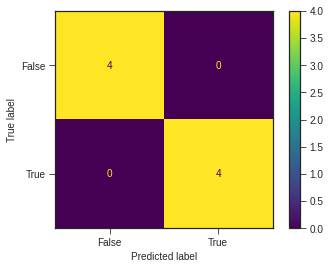

ROC Curve


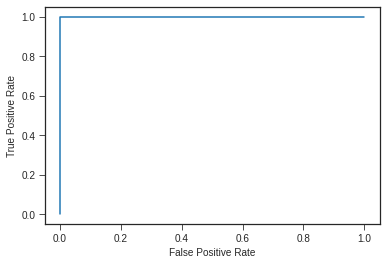

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

#inisialisasi model
svc = SVC(kernel='linear')

# Sesuaikan dt ke set training
svc.fit(x_train, y_train)

# Memprediksi label set test
y_pred_svc = svc.predict(x_val)

# Menghitung set accuracy
acc_svc = accuracy_score(y_val, y_pred_svc)

#Print hasil accuracy
print("Test set accuracy: {:.2f}".format(acc_svc))
print(f"Test set accuracy: {acc_svc}")

#Menghitung set Confusion Matrix
cm_svc = confusion_matrix(y_val, y_pred_svc)
cm_svc_display = ConfusionMatrixDisplay(confusion_matrix  = cm_svc, display_labels = [False, True])

#Print hasil Confusion Matrix
print("Confusion Matrix")
cm_svc_display.plot()
plt.show()

#Mendefinisikan set ROC
fpr, tpr, _ = roc_curve(y_val, y_pred_svc)

#Print hasil ROC curve
print("ROC Curve")
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(x_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(x_val)

# Menghitung set accuracy
acc_dt = accuracy_score(y_val, y_pred_dt)

#Print hasil accuracy
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Memprediksikan Potensi HKI Per Tahun

In [ ]:
#Slice Dataframe
x = df.drop('potensi_hki', axis='columns')
y = df['potensi_hki']

#Cek jumlah fitur dan instance
x.shape

#Splitting Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(x_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(x_test)

# Menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)

#Print hasil accuracy
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

binary_var = ['keterlibatan_vltr', 'skema', 'luaran_hki',
             'potensi_hki', 'luaran_lain']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="tahun", palette = ['gray', 'coral','black','brown'])
